# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

Attributions:
‘Weather data provided by OpenWeather’
https://openweathermap.org/


In [110]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [111]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [112]:
urlx = 'api.openweathermap.org'
query_urlx = f"http://{urlx}/data/2.5/weather?appid={weather_api_key}&units=metric&q="
cityx = "Paris"
cityx_url = f'{query_urlx}{cityx}'
cityx_weather = requests.get(cityx_url).json()
cityx_weather


{'coord': {'lon': 2.3488, 'lat': 48.8534},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 8,
  'feels_like': 5.49,
  'temp_min': 6.34,
  'temp_max': 8.95,
  'pressure': 1018,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 4.12, 'deg': 290},
 'clouds': {'all': 40},
 'dt': 1667596484,
 'sys': {'type': 2,
  'id': 2041230,
  'country': 'FR',
  'sunrise': 1667544114,
  'sunset': 1667579183},
 'timezone': 3600,
 'id': 2988507,
 'name': 'Paris',
 'cod': 200}

In [113]:
# Set the API base URL
# YOUR CODE HERE
url = 'api.openweathermap.org'
query_url = f"http://{url}/data/2.5/weather?appid={weather_api_key}&units=metric&q="


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{query_url}{city}'   # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']



        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | sao filipe
Processing Record 2 of Set 1 | barpeta
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | marienburg
Processing Record 5 of Set 1 | kailua
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | weligama
Processing Record 8 of Set 1 | amapa
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 1 | ostrovnoy
Processing Record 12 of Set 1 | myitkyina
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | faanui
Processing Record 15 of Set 1 | maridi
Processing Record 16 of Set 1 | upernavik
Processing Record 17 of Set 1 | atuona
Processing Record 18 of Set 1 | nikolskoye
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | srednekolymsk
Processing Record 21 of Set 1 | saint-philippe
Processing Record 22 of Set 1 | bluff

In [114]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [115]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,sao filipe,14.8961,-24.4956,27.00,63,100,4.51,CV,1667597199
1,barpeta,26.3167,91.0000,19.46,83,0,2.90,IN,1667597199
2,longyearbyen,78.2186,15.6401,-1.09,86,75,1.54,SJ,1667596917
3,marienburg,54.0359,19.0266,9.93,67,100,4.84,PL,1667597069
4,kailua,21.4022,-157.7394,29.99,76,100,4.47,US,1667597004


In [116]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [117]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao filipe,14.8961,-24.4956,27.00,63,100,4.51,CV,1667597199
1,barpeta,26.3167,91.0000,19.46,83,0,2.90,IN,1667597199
2,longyearbyen,78.2186,15.6401,-1.09,86,75,1.54,SJ,1667596917
3,marienburg,54.0359,19.0266,9.93,67,100,4.84,PL,1667597069
4,kailua,21.4022,-157.7394,29.99,76,100,4.47,US,1667597004


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

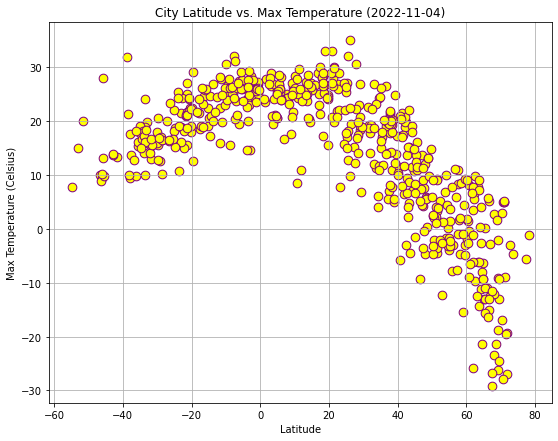

In [118]:
#My Lat vs Temp scatterplot
#  Build scatter plot for latitude vs. temperature

# Incorporate the other graph properties
xlatscatter = [city_data_df['Lat']]
ytempscatter = [city_data_df['Max Temp']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ytempscatter, marker="o", facecolors="yellow", edgecolors="purple",s =75)

# plt.xlim(-55,85)
# plt.ylim(-35,40)
plt.title("City Latitude vs. Max Temperature (2022-11-04)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (Celsius)")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

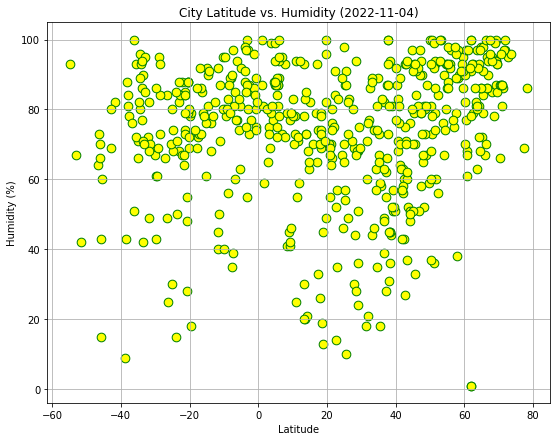

In [119]:
#My scatterplot block for Lat vs humidity
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
#xlatscatter = [city_data_df['Lat']] ALREADY CREATED
yhumidscatter = [city_data_df['Humidity']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, yhumidscatter, marker="o", facecolors="yellow", edgecolors="green",s =75)

# plt.xlim(-55,85)
# plt.ylim(0,105)
plt.title("City Latitude vs. Humidity (2022-11-04)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

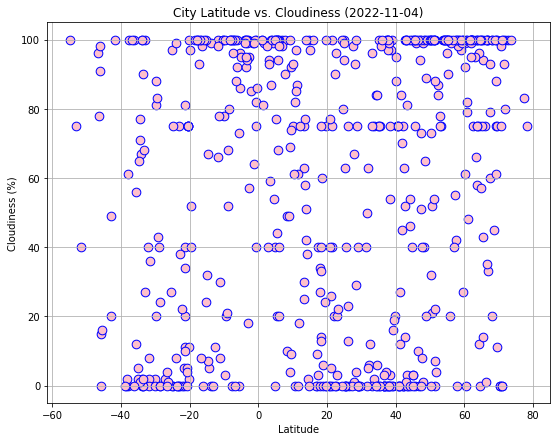

In [120]:
#my scatterplot block for Lat vs cloudiness
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties

#xlatscatter = [city_data_df['Lat']] ALREADY CREATED
ycloudscatter = [city_data_df['Cloudiness']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ycloudscatter, marker="o", facecolors="pink", edgecolors="blue",s =75)

# plt.xlim(-55,85)
# plt.ylim(0,105)
plt.title("City Latitude vs. Cloudiness (2022-11-04)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

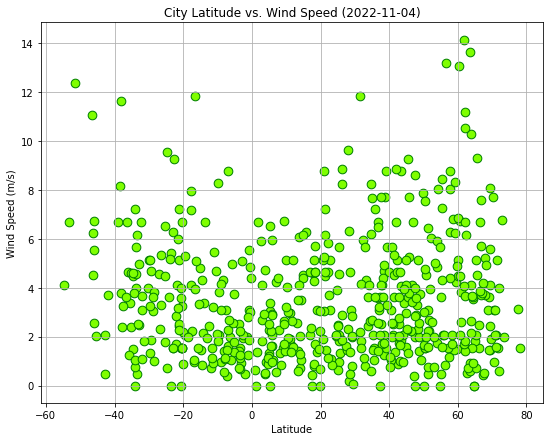

In [121]:
#My scatterplot block for Lat vs wind speed
# # Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties

#xlatscatter = [city_data_df['Lat']] ALREADY CREATED
ywindscatter = [city_data_df['Wind Speed']]

plt.figure(figsize = (9,7))
plt.scatter(xlatscatter, ywindscatter, marker="o", facecolors="chartreuse", edgecolors="green",s =75)

# plt.xlim(-55,85)
# plt.ylim(0,105)
plt.title("City Latitude vs. Wind Speed (2022-11-04)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The r-value is 0.04


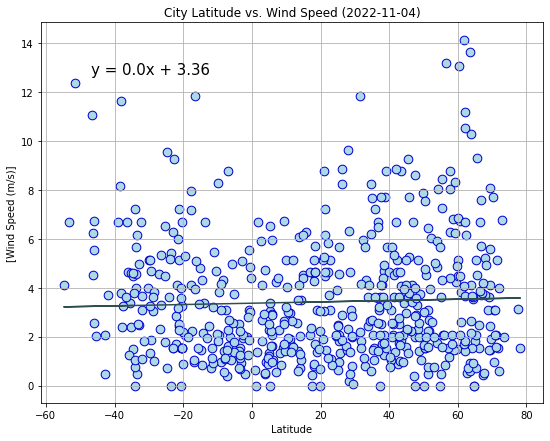

In [149]:
#My  Define a function to create Linear Regression plots
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)


df = city_data_df
datasetID = 'TestFunction'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'
fcolor = 'lightblue'
ecolor = 'mediumblue'

#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html


def LRPlots():
    xdata = df[xparam]
    ydata = df[yparam]

    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.figure(figsize = (9,7))
    plt.scatter(xdata, ydata, marker="o", facecolors=fcolor, edgecolors=ecolor,s =75)

    # plt.xlim(-55,85)
    # plt.ylim(0,105)
    annotatex = min(xdata)+0.1*max(xdata)
    annotatey = max(ydata)-0.1*max(ydata)

    plt.plot(xdata,regress_values,"darkslategray")
    plt.annotate(line_eq,(annotatex,annotatey),fontsize=15,color="black")

    plt.title(f"City Latitude vs. {yparam} (2022-11-04)")
    plt.xlabel("Latitude")
    plt.ylabel(f"[{yparam} {yunits}]")
    plt.grid()


    
    print(f'The r-value is {round(rvalue,2)}')

   

    # Save the figure
    figname = f'{datasetID}_{xparam}_vs_{yparam}'
    
    plt.savefig(f"output_data/{figname}.png")

    # Show plot
    plt.show()

LRPlots()

In [150]:
#My Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,sao filipe,14.8961,-24.4956,27.00,63,100,4.51,CV,1667597199
1,barpeta,26.3167,91.0000,19.46,83,0,2.90,IN,1667597199
2,longyearbyen,78.2186,15.6401,-1.09,86,75,1.54,SJ,1667596917
3,marienburg,54.0359,19.0266,9.93,67,100,4.84,PL,1667597069
4,kailua,21.4022,-157.7394,29.99,76,100,4.47,US,1667597004


In [151]:
#My Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,cidreira,-30.1811,-50.2056,18.03,68,2,3.97,BR,1667597200
8,arraial do cabo,-22.9661,-42.0278,18.92,82,75,1.54,BR,1667596951
11,rikitea,-23.1203,-134.9692,21.49,68,0,6.26,PF,1667597182
12,faanui,-16.4833,-151.7500,24.70,85,98,11.84,PF,1667597202
15,atuona,-9.8000,-139.0333,25.38,80,3,8.27,PF,1667597202


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.84


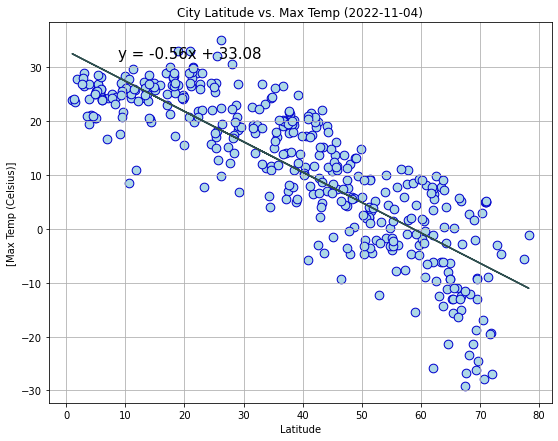

In [152]:
# Linear regression on Northern Hemisphere 
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)

df = northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Max Temp'
yunits = '(Celsius)'
fcolor = 'lightblue'
ecolor = 'mediumblue'


LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

The r-value is 0.69


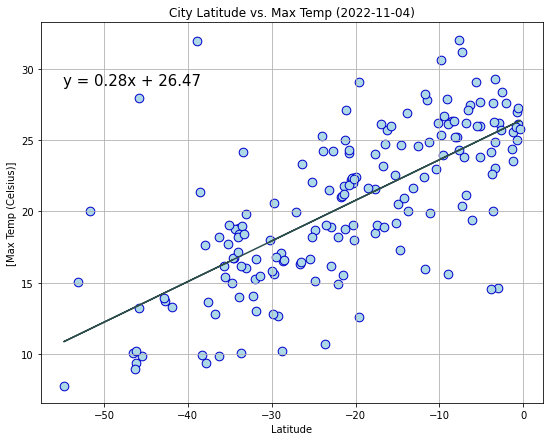

In [153]:
# Linear regression on Southern Hemisphere
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)
     
df = southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Max Temp'
yunits = '(Celsius)'
fcolor = 'lightblue'
ecolor = 'mediumblue'


LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

**Discussion about the linear relationship:**
In the northern hemisphere, there is a very strong correlation (r = 0.86) between latitude and max temperature.  In the southern hemisphere, there is a strong correlation (r = 0.68) between latitude and max temperature.  In both hemispheres, the max temperature increases as you approach the equator (latitude = 0).  

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.25


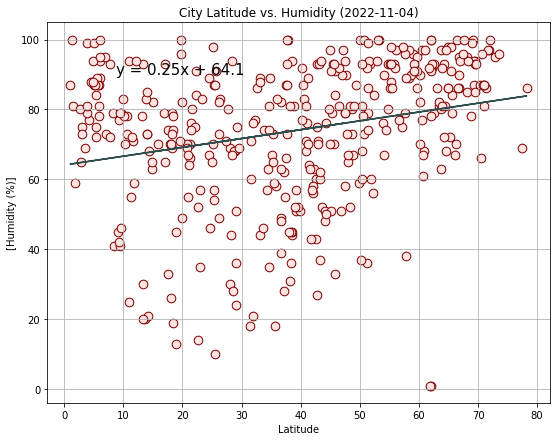

In [154]:
#My Northern Hemisphere Lat vs Humidity
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)  
df = northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Humidity'
yunits = '(%)'
fcolor = 'mistyrose'
ecolor = 'maroon'


LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

The r-value is 0.22


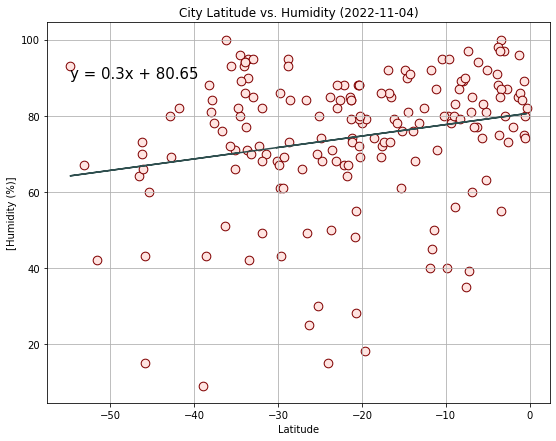

In [155]:
#My Southern Hemisphere Lat vs Humidity
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)  
df = southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Humidity'
yunits = '(%)'
fcolor = 'mistyrose'
ecolor = 'maroon'


LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a weak to moderate correlation (r = 0.36) between latitude and humidity. In the southern hemisphere, there is no  correlation (r =0.12) between latitude and humidity.  Although humidity varies widely across latitudes in both hemispheres, the average humidity in the northern hemisphere appears to increase with latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.17


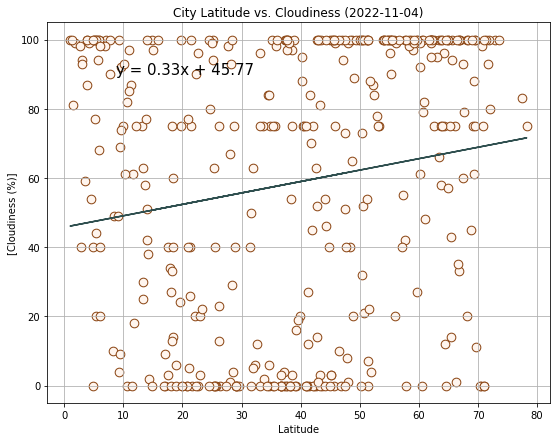

In [156]:
#My Northern Hemisphere Lat vs Cloudiness
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)
df = northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Cloudiness'
yunits = '(%)'
fcolor = 'seashell'
ecolor = 'saddlebrown'


LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

The r-value is 0.31


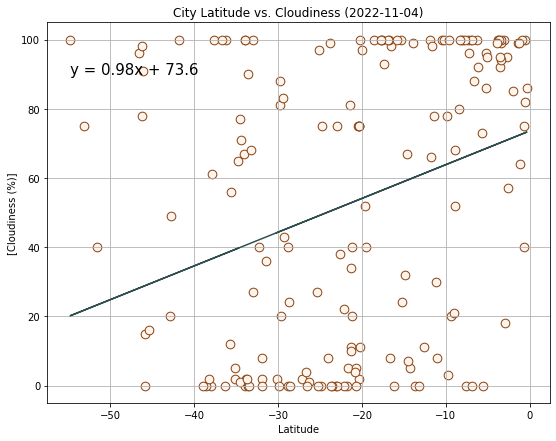

In [157]:
#My Southern Hemisphere Lat vs Cloudiness
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s) 
df = southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Cloudiness'
yunits = '(%)'
fcolor = 'seashell'
ecolor = 'saddlebrown'


LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

**Discussion about the linear relationship:** 
In the northern hemisphere, there is a very weak correlation (r = 0.2) between latitude and cloudiness.  In the southern hemisphere, there is a very weak (r =0.24) between latitude and cloudiness.  Cloudiness varies widely across latitudes in both hemispheres, from 0 to 100%.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.17


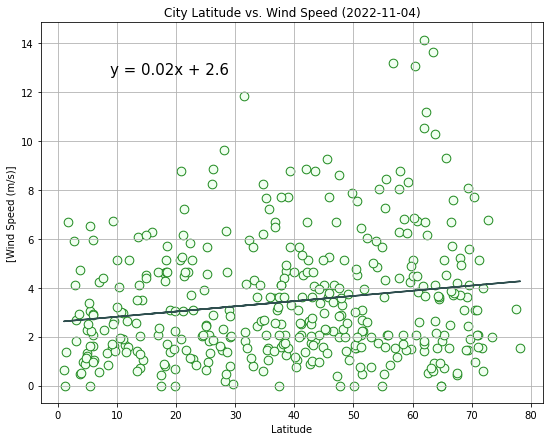

In [158]:
#My Northern Hemisphere Lat vs Wind Speed
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s) 
df = northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'
fcolor = 'honeydew'
ecolor = 'forestgreen'


LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

The r-value is -0.32


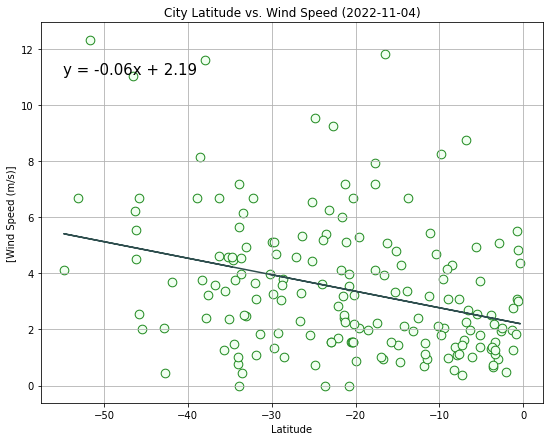

In [159]:
#My Southern Hemisphere Lat vs Wind Speed
# Columns ['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness','Wind Speed', 'Country', 'Date'],
# Max Temp units (Celsius), Humidity units (%), Cloudiness units (%) Wind Speed (m/s)
df = southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'
fcolor = 'honeydew'
ecolor = 'forestgreen'


LRPlots()
#some color options mistyrose and maroon,seashell  and saddlebrown,honeydew and forestgreen,lightblue and meduimblue
#https://matplotlib.org/stable/gallery/color/named_colors.html

**Discussion about the linear relationship:** 
In the northern hemisphere, there is no correlation (r = 0.10) between latitude and wind speed. In the southern hemisphere, there is a weak negative correlation (r = - 0.28) between latitude and wind speed.  Although wind speed varies widely across latitudes in both hemispheres (0-16 m/s), the average wind speed in the southern hemisphere appears to increase with latitude.